In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error  # виправлено функцію MSE


In [2]:
# Завантаження даних
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Виведення перших 5 рядків
print(X.head())
print(y[:5])


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
[4.526 3.585 3.521 3.413 3.422]


In [3]:
# Завдання 3: Перевірка даних на наявність нулів і дублювань
print(X.isna().sum(), y.sum())  # Перевірка на наявність нулів
print(X.duplicated().sum())  # Перевірка на дублікати


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64 42695.04061
0


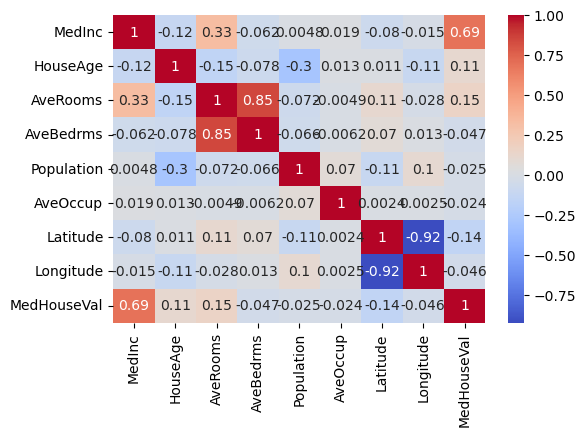

In [4]:
# Завдання 4: Обчислення кореляції та виведення теплової карти
X_corr = pd.concat([X, pd.Series(y, name='MedHouseVal')], axis=1)
corr_matrix = X_corr.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Завдання 5: Поділити дані на тренувальні і тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Завдання 6: Масштабувати ознаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Завдання 7: Побудувати 3 моделі (лін. Регресія, регресія випадковий ліс, Ridge) і підібрати оптимальні параметри через GridSearch
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

best_models = {}

for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train_scaled, y_train)
        print(f"{name} не потребує налаштування параметрів.")



Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...


In [ ]:
# Завдання 8: Вивести R^2 і MSE. Побудувати графіки
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    # Побудовування графіків
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Справжні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title(f'{name}')
    plt.grid(True)
    plt.show()
